In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt

- 데이터셋이 작은 경우, cnn을 통한 모형 학습이 어려워 정확도가 낮을 수 있음
- (해결) data augmentation(이미지 증식)을 통해 데이터의 수를 늘림

- data augmentation이란?
 - 원본 이미지에 다양한 변형을 가해서 학습 데이터 이미지를 늘리는 것과 유사한 효과를 가져옴
 - 원본 이미지를 단순히 늘리는 것이 아닌 색이나 각도의 변형을 통해 늘림
 - cnn의 성능을 높이고 overfitting을 극복할 수 있는 방법


In [84]:
# .DS_Store파일 로드가 되어 오류가 남 --> 해당 파일은 Desktop Services Store 약자로, macOS 운영체제에서 Finder로 폴더를 볼 때마다 자동으로 생성되는 파일
# 해당 파일을 삭제하는 방법 : 터미널에서 디렉토리 이동한 후 ls -a | grep .DS_Store 명령어로 해당 파일이 있는지 확인 --> rm .DS_Store 로 삭제하기

# import PIL
# from PIL import Image
# import io

# dirr = 'train_dataset/Bathroom/'
# path = os.listdir('train_dataset/Bathroom/')
# for p in path:
#     try:
#         with open(dirr + p, 'rb') as f:
#             data = f.read()
#         print(p)
#         data_io = io.BytesIO(data)
#         img = Image.open(data_io)
#     except :
#         break

In [93]:
# 이외에도 UnidentifiedImageError: cannot identify image file <_io.BytesIO object at  오류가 여전히 존재

# import os
# from PIL import Image

# folder_path = "train_dataset/"
# extensions = []
# corupt_img_paths=[]
# for fldr in os.listdir(folder_path):
#     sub_folder_path = os.path.join(folder_path, fldr)
#     for filee in os.listdir(sub_folder_path):
#         file_path = os.path.join(sub_folder_path, filee)
#         print('** Path: {}  **'.format(file_path), end="\r", flush=True)
#         try:
#             im = Image.open(file_path)
#         except:
#             print(file_path)
#             os.remove(file_path)
#             continue
#         else:
#             rgb_im = im.convert('RGB')
#             if filee.split('.')[1] not in extensions:
#                 extensions.append(filee.split('.')[1])

train_dataset/Bathroom/Bathroom_97.jpgom_97.jpg  ****


/Users/choinjeong/anaconda3/envs/cho_3_9/lib/python3.9/site-packages/PIL/Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  for i in range(0, len(transparency))


In [2]:
# 이미지 데이터 생성기 설정

data_dir = 'train_dataset/'
test_dir = 'test_dataset/'

image_size = (128,128) # 이미지 크기 (128,128)
batch_size = 32       # 배치 크기

train_gen = ImageDataGenerator(rescale = 1/255,         # 픽셀값을 0~1 사이로 스케일링
                             validation_split=0.2,      # 검증 데이터 비율
                             rotation_range = 40,       # random rotation 각도 범위(0~180)
                             width_shift_range = 0.2,   # 수평 이동 범위(비율) [-0.2, 0, +0.2] ex)[-1, -0.5, 0, 0.5, 1]
                             height_shift_range = 0.2,  # 수직 이동 범위(비율)
                             shear_range = 0.2,         # 기울어지는 변환의 각도 범위(반시계 방향)
                             zoom_range = 0.2,          # 확대 비율([lower, upper] = [1-zoom_range, 1+zoom_range])
                             horizontal_flip = True     # 수평으로 뒤집음
                            )

valid_gen = ImageDataGenerator(rescale = 1/255) # rescale만 진행

In [3]:

train_generator = train_gen.flow_from_directory(data_dir,
                                              target_size=image_size,
                                              batch_size=batch_size,
                                              class_mode='categorical') # 학습데이터로 사용, categorical

validation_generator = valid_gen.flow_from_directory(test_dir,
                                              target_size=image_size,
                                              batch_size=batch_size,
                                              class_mode='categorical') # 검증데이터로 사용

Found 9373 images belonging to 5 classes.
Found 2349 images belonging to 5 classes.


In [4]:
train_generator.class_indices

{'Bathroom': 0, 'Bedroom': 1, 'Dinning': 2, 'Kitchen': 3, 'Livingroom': 4}

In [5]:
# numpy 배열로 전환
train_images = []
train_labels = []

for images, labels in train_generator:
    train_images.extend(images)
    train_labels.extend(labels)
    if len(train_images) >= len(train_generator.filepaths):
        break

train_images = np.array(train_images)
train_labels = np.array(train_labels)

# 클래스 라벨을 숫자로 변환
train_labels_numeric = np.argmax(train_labels, axis=1) # axis=1, 클래스가 2개인 경우 axis안함

# 변환된 데이터 확인
print("train images shape:", train_images.shape)
print("train labels shape:", train_labels_numeric.shape)

/Users/choinjeong/anaconda3/envs/cho_3_9/lib/python3.9/site-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


train images shape: (9373, 128, 128, 3)
train labels shape: (9373,)


In [6]:
# numpy 배열로 전환
test_images = []
test_labels = []

for images, labels in validation_generator:
    test_images.extend(images)
    test_labels.extend(labels)
    if len(test_images) >= len(validation_generator.filepaths):
        break

test_images = np.array(test_images)
valid_labels = np.array(test_labels)

# 클래스 라벨을 숫자로 변환
test_labels_numeric = np.argmax(test_labels, axis=1) # axis=1

# 변환된 데이터 확인
print("train images shape:", test_images.shape)
print("train labels shape:", test_labels_numeric.shape)

train images shape: (2349, 128, 128, 3)
train labels shape: (2349,)


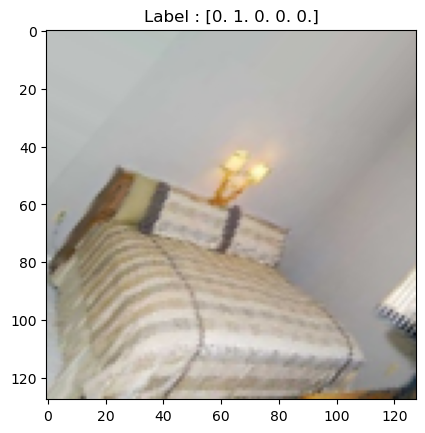

In [7]:
# 이미지 시각화
plt.imshow(train_images[0], cmap='gray') # 첫번째 사진
plt.title(f'Label : {train_labels[0]}')
plt.show()

In [14]:
# CNN 모델 정의
model = models.Sequential([layers.Conv2D(32, kernel_size=(3, 3), activation = 'relu', input_shape=(128,128,3)), # 32: filters(필터의 개수), (3,3) 커널(필터)의 크기
                           layers.MaxPooling2D((2,2)), # 입력 이미지를 2x2 윈도우로 잘라서 각 윈도우에서 가장 큰 값을 뽑아내는 방식
                           layers.Conv2D(64, (3, 3), activation='relu'),
                           layers.MaxPooling2D((2,2)),
                           layers.Conv2D(64, (3, 3), activation = 'relu'),
                           layers.Flatten(), # 입력(다차원 배열)을 평탄화
                           layers.Dense(64, activation = 'relu'), # 64 : units, activation 활성화 함수 : relu(은닉층으로 학습)/sigmoid(이진분류)/softmax(클래스분류)
                           layers.Dense(5, activation='softmax')])

In [10]:
# 모델 컴파일
model.compile(optimizer='adam', # adam
              loss = 'categorical_crossentropy', # 다중 클래스 분류 손실, binary, sparse
              metrics=['accuracy'])

In [11]:
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', # stop 조건으로 관찰할 변수 선택
                                                 patience = 5) # 10 Epoch동안 val_accuracy가 개선되지 않는다면 종료

history = model.fit(train_generator,
                    epochs=100,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator),
                    callbacks = [earlystopping]
                    )

Epoch 1/100


2023-08-30 15:49:35.154988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-08-30 15:49:35.159709: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


293/293 [==============================] - ETA: 0s - loss: nan - accuracy: 0.2435

2023-08-30 15:50:49.515132: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


293/293 [==============================] - 87s 294ms/step - loss: nan - accuracy: 0.2435 - val_loss: 1.5889 - val_accuracy: 0.2708
Epoch 2/100
293/293 [==============================] - 85s 288ms/step - loss: nan - accuracy: 0.2574 - val_loss: 1.5628 - val_accuracy: 0.2703
Epoch 3/100
293/293 [==============================] - 86s 292ms/step - loss: nan - accuracy: 0.2728 - val_loss: 1.5514 - val_accuracy: 0.3018
Epoch 4/100
293/293 [==============================] - 86s 292ms/step - loss: nan - accuracy: 0.2746 - val_loss: 1.5733 - val_accuracy: 0.2848
Epoch 5/100
293/293 [==============================] - 87s 297ms/step - loss: nan - accuracy: 0.2813 - val_loss: 1.5220 - val_accuracy: 0.3261
Epoch 6/100
293/293 [==============================] - 92s 315ms/step - loss: nan - accuracy: 0.2952 - val_loss: 1.5022 - val_accuracy: 0.3401
Epoch 7/100
293/293 [==============================] - 91s 310ms/step - loss: nan - accuracy: 0.3146 - val_loss: 1.4948 - val_accuracy: 0.3470
Epoch 8/100

KeyboardInterrupt: 

In [11]:
model.evaluate(validation_generator)

2023-08-30 15:25:11.737181: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


74/74 [==============================] - 13s 169ms/step - loss: 1.1162 - accuracy: 0.5556


[1.1161930561065674, 0.5555555820465088]

In [12]:
model.save('cnn_basic.h5')

In [142]:
model.summary()
# Layer (type)
# - Conv2D : 2D 이미지에서 특징을 추출하기 위해 사용되는 레이어. 작은 윈도우(커널)를 이미지 위를 슬라이딩 하면서 특징을 감지
# - MaxPooling2D : 이미지 데이터의 공간 크기를 줄이기 위해 사용
# output shape - (None, 126, 126, 32) : 첫 번째 차원은 배치 크기, 나머지 차원은 데이터의 형태
# param #  : 각 레이어의 학습 가능한 매개변수의 수. 이 수치는 모델이 학습 중에 업데이트 되는 가중치의 수를 의미

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 flatten_3 (Flatten)         (None, 50176)            

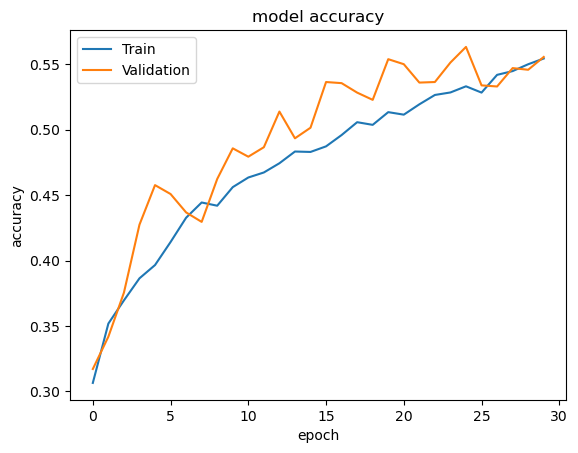

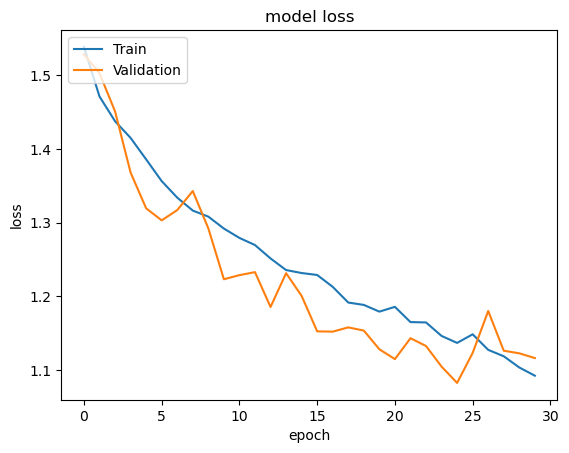

In [15]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [18]:
# 테스트 데이터로 성능 평가
valid_loss, valid_acc = model.evaluate(test_images, valid_labels)
print('테스트 정확도 :', valid_acc) # loss : 4.5408, accuracy : 0.4380

74/74 [==============================] - 2s 29ms/step - loss: 1.1162 - accuracy: 0.5556
테스트 정확도 : 0.5555555820465088


In [17]:
predictions = model.predict(test_images)
print('validation_labels : ', np.argmax(test_labels[:10],axis=1))
print('prediction_labels : ', np.argmax(predictions[:10],axis=1))

74/74 [==============================] - 2s 29ms/step
validation_labels :  [1 3 0 1 0 3 1 3 2 4]
prediction_labels :  [1 3 0 1 0 0 1 1 1 1]


In [23]:
# 새로운 이미지 분류 예측
import cv2
# new_image = plt.imread('valid/bathroom.jpeg') # 0
# new_image = plt.imread('valid/bedroom.jpeg') # 1
# new_image = plt.imread('valid/dinning.jpeg') # 2
# new_image = plt.imread('valid/kitchen.jpeg') # 3
# new_image = plt.imread('valid/livingroom.jpeg') # 4

# plt.imshow(new_image)
# plt.show()
# new_image = cv2.resize(new_image,(128,128))
# new_image = new_image.reshape(1,128,128,3)
new_image = cv2.resize(new_image, (128,128))
new_image = np.reshape(new_image, [1, 128, 128, 3])
print(np.argmax(model.predict(new_image)))

# prediction = model.predict(new_image)
# predicted_class = np.argmax(prediction)
# print('예측 클래스:', predicted_class)


1/1 [==============================] - 0s 17ms/step
1


In [24]:
train_generator.class_indices

{'Bathroom': 0, 'Bedroom': 1, 'Dinning': 2, 'Kitchen': 3, 'Livingroom': 4}